TITANIC SURVIVAL PREDICTION


Step 1: Data Loading

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("data/Titanic-Dataset.csv")

print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Step 2: Data Preprocessing

In [9]:
print(data.isnull().sum())

data['Age'].fillna(data['Age'].median(), inplace=True)

most_common_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(most_common_embarked, inplace=True)

data.drop('Cabin', axis=1, inplace=True)

data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

print(data.head())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171 

Step 3: Exploratory Data Analysis (EDA)

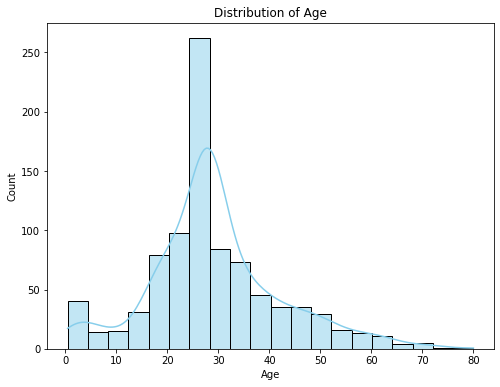

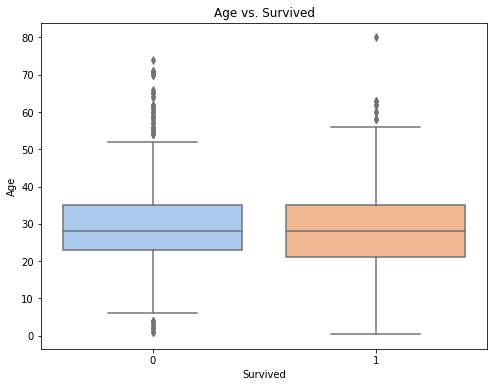

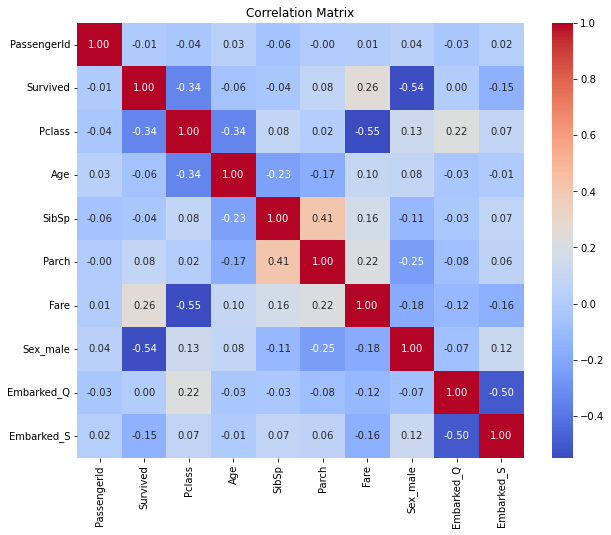

In [10]:
# Visualize the distribution of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualize the relationship between 'Age' and 'Survived'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=data, palette='pastel')
plt.title('Age vs. Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Step 4: Feature Engineering

In [17]:
# Create a new feature 'FamilySize'
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1  # Adding 1 for the passenger themselves

data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

             Ticket     Fare Cabin Embarked  FamilySize  
0         A/5 21171   7.2500   NaN        S           2  
1          PC 17599  71.2833   C85        C           2  
2  STON/O2. 3101282   7.9250   NaN        S           1  
3            113803  53.1000  C123        S           2  
4            373450   8.0500   NaN        S           1  


Step 5: Model Selection - Advanced Algorithms

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


X = data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = data['Survived']

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting Machine': GradientBoostingClassifier()
}

# Evaluate models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{name}: Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')


Decision Tree: Accuracy: 0.7688 (+/- 0.0257)
Random Forest: Accuracy: 0.8036 (+/- 0.0257)
Support Vector Machine: Accuracy: 0.6713 (+/- 0.0437)
Gradient Boosting Machine: Accuracy: 0.8317 (+/- 0.0239)


Step 6: Random  Forest Model and Training

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X = data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.8268156424581006


Step 7: Model Evaluation

In [13]:
from sklearn.model_selection import cross_val_score

# Evaluate Random Forest model using cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.77653631 0.79775281 0.85393258 0.78651685 0.82022472]
Mean Accuracy: 0.8069926558282594
